## Running a Regression in Python

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*A teacher at school decided her students should take an IQ test. She prepared 5 tests she believed were aligned with the requirements of the IQ examination.
The father of one child in the class turned out to be an econometrician, so he asked her for the results of the 30 kids. The file contained the points they earned on each test and the final IQ score.*

Load the IQ_data excel file.

# khai báo thư viện

In [7]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data=pd.read_excel('/content/drive/MyDrive/ptdl/tuan10/da07/03_regression/01_Running a Regression/IQ_data.xlsx')

In [10]:
data

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
0,107,84,35,66,64,65
1,93,74,20,74,49,83
2,103,55,82,83,66,74
3,122,97,73,92,89,95
4,103,85,54,73,69,83
5,106,87,73,64,78,58
6,98,77,63,65,70,65
7,93,55,50,44,53,85
8,95,38,44,93,40,73
9,13,43,55,97,49,84


Prepare the data for a univariate regression of Test 1 based on the IQ result. Store the Test 1 scores in a variable, called X, and the IQ points in another variable, named Y.

In [11]:
data[['IQ', 'Test 1']]

,IQ,Test 1
0,107,84
1,93,74
2,103,55
3,122,97
4,103,85
5,106,87
6,98,77
7,93,55
8,95,38
9,13,43


### Univariate Regression

In [12]:
X = data['Test 1']
Y = data['IQ']

In [13]:
X

,Test 1
0,84
1,74
2,55
3,97
4,85
5,87
6,77
7,55
8,38
9,43


In [14]:
Y

,IQ
0,107
1,93
2,103
3,122
4,103
5,106
6,98
7,93
8,95
9,13


Create a well-organized scatter plot. Use the “axis” method with the following start and end points: [0, 120, 0, 150]. Label the axes “Test 1” and “IQ”, respectively.

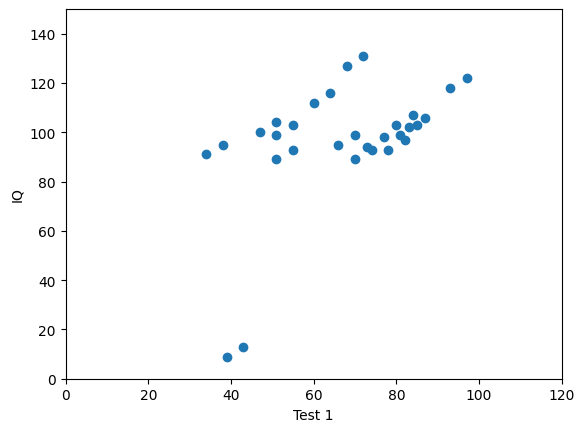

In [15]:
plt.scatter(X,Y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()

Phân tích
* Hình dạng: Các điểm dữ liệu trên biểu đồ có xu hướng phân bố theo một đường hướng lên từ trái sang phải, tuy nhiên, sự phân tán của các điểm là khá lớn (đặc biệt có một điểm cá biệt nằm rất thấp).

* Hướng: Có vẻ như có một mối quan hệ dương (positive correlation) giữa Điểm Test 1 và Điểm IQ. Điều này có nghĩa là khi Điểm Test 1 tăng, Điểm IQ cũng có xu hướng tăng.

* Độ mạnh: Mặc dù có xu hướng dương, các điểm không nằm quá gần một đường thẳng. Điều này cho thấy mối quan hệ này không quá mạnh (tức là hệ số tương quan không quá gần 1). Sự phân tán này cho thấy Điểm Test 1 có thể giải thích được MỘT PHẦN sự thay đổi của Điểm IQ, nhưng nó không phải là yếu tố duy nhất hoặc tốt nhất.


Just by looking at the graph, do you believe Test 1 is a good predictor of the final IQ score?

Câu trả lời là: không hẳn.

Mặc dù có một mối quan hệ tích cực (dương) giữa Điểm Test 1 và Điểm IQ (người làm Test 1 tốt hơn thường có IQ cao hơn), sự phân tán lớn của các điểm cho thấy Điểm Test 1 chưa phải là một yếu tố dự đoán mạnh mẽ và đáng tin cậy của Điểm IQ.

Để một biến là "yếu tố dự đoán tốt", các điểm dữ liệu cần phải nằm rất sát nhau xung quanh một đường hồi quy (tương quan mạnh), điều mà biểu đồ này chưa thể hiện rõ ràng do sự phân tán và sự hiện diện của điểm ngoại lai (outlier) rõ rệt.